In [23]:
import pandas as pd

#esto es un notebook 
df = pd.read_csv(r'C:\geo_proyectos\listings.csv')

In [24]:
df.head(3)



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,49392,Rental unit in Santiago · 1 bedroom · 1 bed,224592,Maria,NaN,Providencia,-33.43277,-70.59892,Private room,42557,3,0,NaN,NaN,1,178,0,NaN
1,52811,Rental unit in Providencia · ★4.42 · 1 bedroom...,244792,Cristián,NaN,Providencia,-33.42959,-70.61880,Entire home/apt,43360,1,46,2021-11-04,0.30,3,270,0,NaN
2,442241,Rental unit in Santiago · ★4.83 · 1 bedroom · ...,1899907,Paola,NaN,Recoleta,-33.42151,-70.64035,Private room,16059,3,164,2022-09-23,1.21,1,0,8,NaN


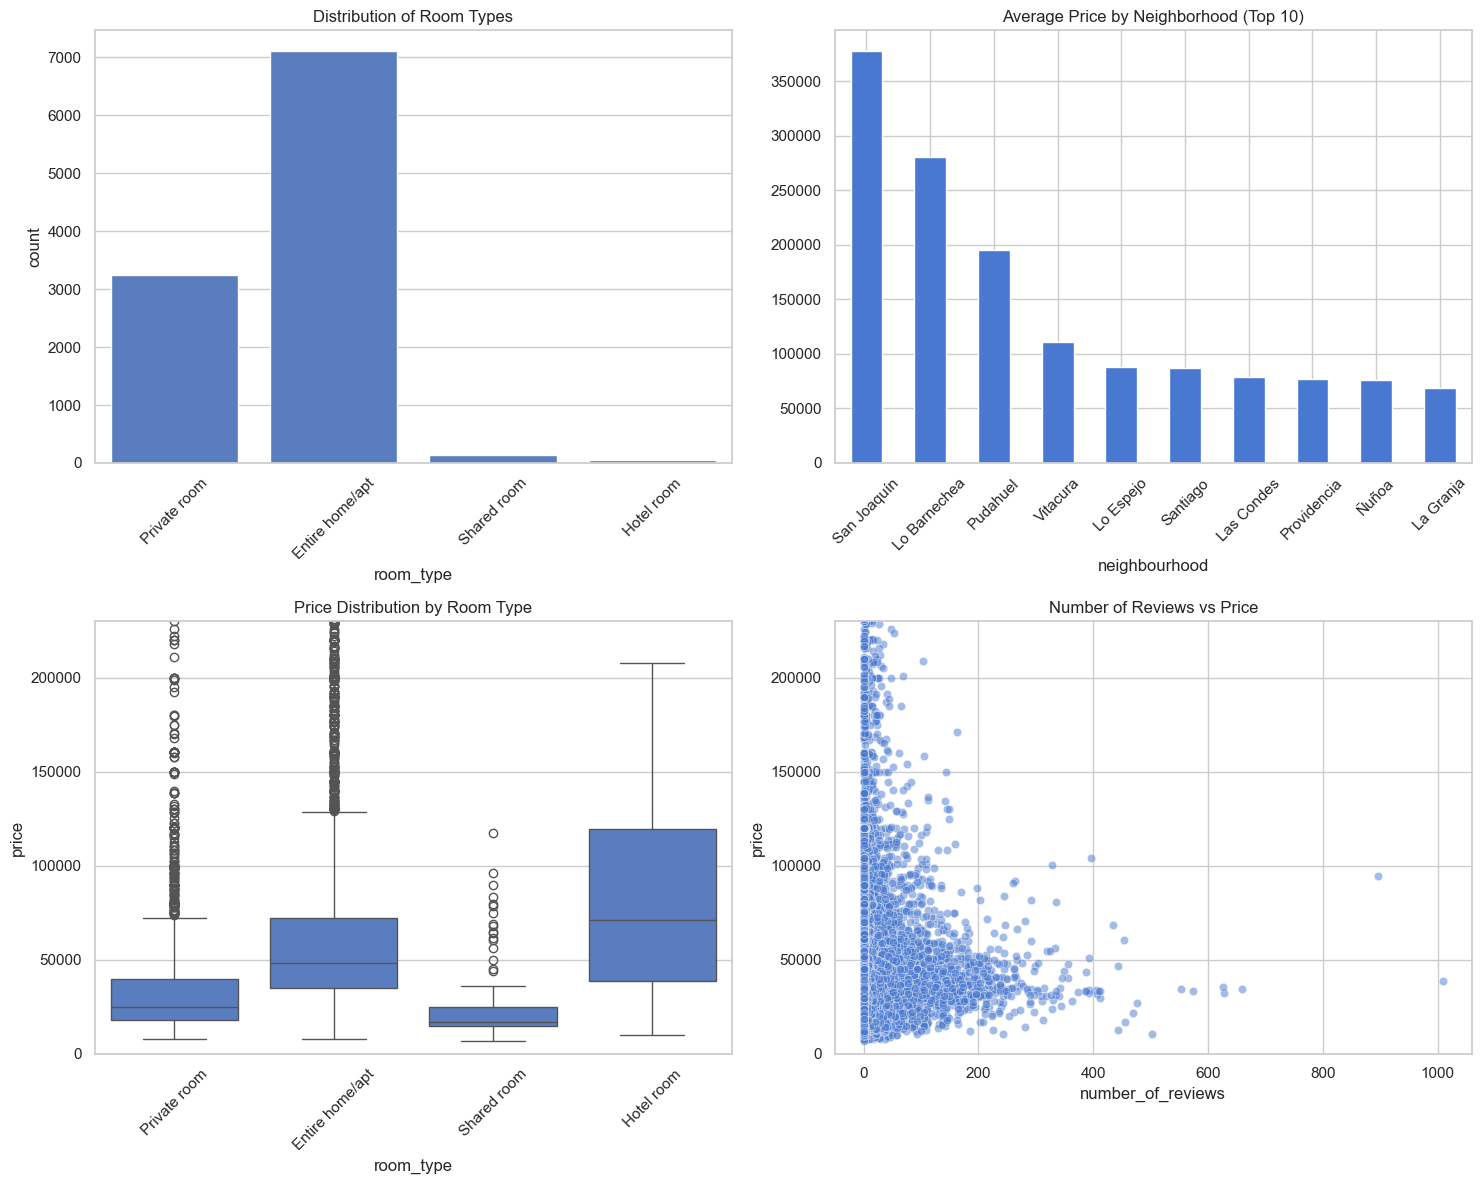

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set the style for better visualizations

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Room type distribution
sns.countplot(data=df, x='room_type', ax=axes[0,0])
axes[0,0].set_title('Distribution of Room Types')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Top 10 neighborhoods by average price
avg_price_neigh = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)
avg_price_neigh.plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Average Price by Neighborhood (Top 10)')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Price distribution by room type
sns.boxplot(data=df, x='room_type', y='price', ax=axes[1,0])
axes[1,0].set_title('Price Distribution by Room Type')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].set_ylim(0, df['price'].quantile(0.95))  # Limiting y-axis to 95th percentile for better visualization

# 4. Number of reviews vs price
sns.scatterplot(data=df, x='number_of_reviews', y='price', alpha=0.5, ax=axes[1,1])
axes[1,1].set_title('Number of Reviews vs Price')
axes[1,1].set_ylim(0, df['price'].quantile(0.95))  # Limiting y-axis to 95th percentile for better visualization

plt.tight_layout()
plt.show()
